Como e por que as três versões do programa se comportam com a variação

– Do tamanho da entrada? 
FULL, sem IO e mem
Seq time x size (full, seq, threads 1, sem IO e Mem)
Pth time x size (full, threads 1, sem IO e Mem)
Pth time  x size (full, threads 2, sem IO e Mem)
Pth time x size (full, threads 4, sem IO e Mem)
Pth time x size (threads 8, sem IO e Mem)
Pth time x size (threads 16, sem IO e Mem)
Pth time x size (threads 32, sem IO e Mem)
Omp time x size (threads 1, sem IO e Mem)
Omp time x size (threads 2, sem IO e Mem)
Omp time x size (threads 4, sem IO e Mem)
Omp time x size (threads 8, sem IO e Mem)
Omp time x size (threads 16, sem IO e Mem)
Omp time x size (threads 32, sem IO e Mem)

– Das regiões do Conjunto de Mandelbrot? 
8192, sem io e mem
Seq time x region 1 thread
Pth time x region 1 thread
Pth time x region 2 thread
Pth time x region 4 thread
Pth time x region 8 thread
Pth time x region 16 thread
Pth time x region 32 thread
omp time x region 1 thread
omp time x region 2 thread
omp time x region 4 thread
omp time x region 8 thread
omp time x region 16 thread
omp time x region 32 thread

– Do número de threads? 
FULL, 8192
pth time x threads size 16 (seq para comparação)
omp time x threads size 16  (seq para comparação)
(...)
pth time x threads size 8192
omp time x threads size 8192

Qual o impacto das operações de I/O e alocação de memória no tempo de execução?
gráfico de % do tempo por tamanho - full
gráfico de % do tempo por tamanho - elephant
gráfico de % do tempo por tamanho - spiral
gráfico de % do tempo por tamanho - seahorse
gráfico de tempo por tamanho - full
gráfico de tempo por tamanho - elephant
gráfico de tempo por tamanho - spiral
gráfico de tempo por tamanho - seahorse


## Descrição dos experimentos

### Sequencial
Foram realizadas 10 medições para cada cenário do programa sequencial. As variações incluíram modificar a imagem gerada e o seu tamanho (uma potência de 2 entre $2^{4}$ e $2^{13}$).

### Pthread e OMP
Além dos mesmos experimentos feitos na versão sequencial, também foram realizados experimentos alterando o número de threads (uma potência de 2 entre $2^{0}$ e $2^{5}$).

### Flag -O3
Incluímos também um experimento utilizando a flag do compilador -O3 para os algoritmos sequencial, Pthread e OMP, porém testamos sem instruções de alocação de memória e I/O.

## Análises e gráficos
Para começar a análise dos dados e sua visualização, precisamos importar as bibliotecas conforme comando abaixo:

In [1]:
import Pkg; Pkg.add("CSV"); Pkg.add("DataFrames"); Pkg.add("Gadfly"); Pkg.add("DataFramesMeta")

In [2]:
using CSV
using DataFrames
using DataFramesMeta
using Gadfly
# using CategoricalArrays
set_default_plot_size(21cm, 12cm)

Os resultados dos experimentos se encontram no arquivo results.tsv, que vamos armazenar em um dataframe df.

In [3]:
df = DataFrame(CSV.File("results.tsv", header=1, delim="\t"))
first(df, 5)

5×13 DataFrame
 Row │ Algorithm       Image         Size   Threads  Time      Stddev    Clock ⋯
     │ String          String        Int64  Int64    Float64   Float64   Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ mandelbrot_seq  elephant.log     16        1  0.001221  4.25e-5   0.87  ⋯
   2 │ mandelbrot_seq  elephant.log     32        1  0.00255   0.000221  2.16
   3 │ mandelbrot_seq  elephant.log     64        1  0.009084  0.000776  8.7
   4 │ mandelbrot_seq  elephant.log    128        1  0.02641   0.000716  26.04
   5 │ mandelbrot_seq  elephant.log    256        1  0.09824   0.00904   97.76 ⋯
                                                               7 columns omitted

## Análise dos dados 
Vamos começar as análises desconsiderando os dados que estão marcados com a flag de otimização -O3

In [4]:
df = filter(row -> row.O3 == 0, df)
first(df, 5)

5×13 DataFrame
 Row │ Algorithm       Image         Size   Threads  Time      Stddev    Clock ⋯
     │ String          String        Int64  Int64    Float64   Float64   Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ mandelbrot_seq  elephant.log     16        1  0.001221  4.25e-5   0.87  ⋯
   2 │ mandelbrot_seq  elephant.log     32        1  0.00255   0.000221  2.16
   3 │ mandelbrot_seq  elephant.log     64        1  0.009084  0.000776  8.7
   4 │ mandelbrot_seq  elephant.log    128        1  0.02641   0.000716  26.04
   5 │ mandelbrot_seq  elephant.log    256        1  0.09824   0.00904   97.76 ⋯
                                                               7 columns omitted

Descrevendo nosso dataset de resultados

In [5]:
describe(df)

13×7 DataFrame
 Row │ variable      mean       min             median   max                nm ⋯
     │ Symbol        Union…     Any             Union…   Any                In ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Algorithm                mandelbrot_omp           mandelbrot_seq        ⋯
   2 │ Image                    elephant.log             triple_spiral.log
   3 │ Size          1636.8     16              384.0    8192
   4 │ Threads       9.76923    1               4.0      32
   5 │ Time          4.39878    0.000848        0.16395  106.775               ⋯
   6 │ Stddev        0.0385147  1.15e-5         0.0151   0.511
   7 │ Clock                    0.38                     996.22
   8 │ CPUs          3.82542    0.007           1.7495   28.868
   9 │ Cycles                   1,025,999,471            996,051,709           ⋯
  10 │ Instructions             1,004,161,076            99,999,907
  11 │ IO            0.333333   0               0.0      1
  12 │ MemAlloc      0.666667   0               1.0      1
  13 │ O3            0.0        0               0.0      0                     ⋯
                                                               2 columns omitted

Transformando em categóricas algumas colunas que estão como numéricas

In [6]:
df = @linq df |>
    transform(Threads = string.(:Threads)) |>
    transform(IO = string.(:IO)) |>
    transform(MemAlloc = string.(:MemAlloc));

Para responder às primeiras perguntas, utilizaremos os dados sem impacto de alocação de memória e IO.

In [7]:
    df_noio_nomem = @linq df |>
        where(:IO .== "0") |>
        where(:MemAlloc .== "0");

# Como e por que as três versões do programa se comportam com a variação:

## Do tamanho da entrada?

Para analisar o comportamento dos algoritmos em função do tamanho da entrada, vamos fixar os seguintes parâmetros:

* Algoritmos: Sequencial, PThreads e OpenMP
* Região: full
* Threads: 1 a 32
* Tamanho: 16 a 8192
* Sem alocação de memória e I/O

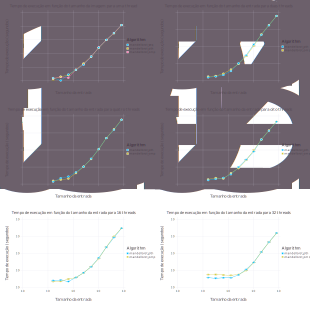

In [8]:
set_default_plot_size(31cm, 31cm)
df_size_one = filter(row -> row.Image == "full.log" && row.Threads == "1", df_noio_nomem)
ymins = df_size_one.Time .- 2.262 * (df_size_one.Stddev / sqrt(9))
ymaxs = df_size_one.Time .+ 2.262 * (df_size_one.Stddev / sqrt(9))
plot_one = plot(df_size_one, 
    x=:Size,
    Guide.xlabel("Tamanho da entrada"),
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Algorithm,
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Geom.point,
    Geom.line,
    Geom.errorbar,
    Scale.x_log10,
    Scale.y_log10,
    Guide.title("Tempo de execução em função do tamanho da imagem para uma thread"))

df_size_two = filter(row -> row.Image == "full.log" && row.Threads == "2" && row.Algorithm != "mandelbrot_seq", df_noio_nomem)
ymins = df_size_two.Time .- 2.262 * (df_size_two.Stddev / sqrt(9))
ymaxs = df_size_two.Time .+ 2.262 * (df_size_two.Stddev / sqrt(9))
plot_two = plot(df_size_two, 
    x=:Size,
    Guide.xlabel("Tamanho da entrada"),
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Algorithm,
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Geom.point,
    Geom.line,
    Geom.errorbar,
    Scale.x_log10,
    Scale.y_log10,
    Guide.title("Tempo de execução em função do tamanho da entrada para duas threads"))

df_size_three = filter(row -> row.Image == "full.log" && row.Threads == "4" && row.Algorithm != "mandelbrot_seq", df_noio_nomem)
ymins = df_size_three.Time .- 2.262 * (df_size_three.Stddev / sqrt(9))
ymaxs = df_size_three.Time .+ 2.262 * (df_size_three.Stddev / sqrt(9))
plot_three = plot(df_size_three, 
    x=:Size,
    Guide.xlabel("Tamanho da entrada"),
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Algorithm,
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Geom.point,
    Geom.line,
    Geom.errorbar,
    Scale.x_log10,
    Scale.y_log10,
    Guide.title("Tempo de execução em função do tamanho da entrada para quatro threads"))

df_size_four = filter(row -> row.Image == "full.log" && row.Threads == "8" && row.Algorithm != "mandelbrot_seq", df_noio_nomem)
ymins = df_size_four.Time .- 2.262 * (df_size_four.Stddev / sqrt(9))
ymaxs = df_size_four.Time .+ 2.262 * (df_size_four.Stddev / sqrt(9))
plot_four = plot(df_size_four, 
    x=:Size,
    Guide.xlabel("Tamanho da entrada"),
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Algorithm,
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Geom.point,
    Geom.line,
    Geom.errorbar,
    Scale.x_log10,
    Scale.y_log10,
    Guide.title("Tempo de execução em função do tamanho da entrada para oito threads"))

df_size_five = filter(row -> row.Image == "full.log" && row.Threads == "16" && row.Algorithm != "mandelbrot_seq", df_noio_nomem)
ymins = df_size_five.Time .- 2.262 * (df_size_five.Stddev / sqrt(9))
ymaxs = df_size_five.Time .+ 2.262 * (df_size_five.Stddev / sqrt(9))
plot_five = plot(df_size_five, 
    x=:Size,
    Guide.xlabel("Tamanho da entrada"),
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Algorithm,
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Geom.point,
    Geom.line,
    Geom.errorbar,
    Scale.x_log10,
    Scale.y_log10,
    Guide.title("Tempo de execução em função do tamanho da entrada para 16 threads"))

df_size_six = filter(row -> row.Image == "full.log" && row.Threads == "32" && row.Algorithm != "mandelbrot_seq", df_noio_nomem)
ymins = df_size_six.Time .- 2.262 * (df_size_six.Stddev / sqrt(9))
ymaxs = df_size_six.Time .+ 2.262 * (df_size_six.Stddev / sqrt(9))
plot_six = plot(df_size_six, 
    x=:Size,
    Guide.xlabel("Tamanho da entrada"),
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Algorithm,
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Geom.point,
    Geom.line,
    Geom.errorbar,
    Scale.x_log10,
    Scale.y_log10,
    Guide.title("Tempo de execução em função do tamanho da entrada para 32 threads"))

vstack(hstack(plot_one,plot_two),
hstack(plot_three,plot_four),hstack(plot_five, plot_six))

Os gráficos apresentam o tempo de execução em segundos em função do tamanho da entrada para os três algoritmos utilizando 1, 2, 4, 8, 16 e 32 threads na região full. Uma entrada de tamanho N produz como resultado de uma imagem de dimensões N x N.

O primeiro gráfico mostra que os três algoritmos se comportam de forma muito semelhante em relação ao tamanho da entrada, variando no máximo 0.52s, e na média 0.03s. As entradas menores possuem variação percentual maior entre os algoritmos, pois os valores nominais são mais baixos. Dos outros cinco gráficos podemos depreender que o número de threads, apesar de reduzir o tempo de execução total, não muda a complexidade do algoritmo, e portanto não altera o formato dos gráficos em relação ao tamanho da entrada.

Para computar o conjunto de Mandelbrot, realizamos operações para cada pixel da imagem. Portanto, para uma imagem de tamanho N x N, a complexidade do algoritmo é O(N²). Podemos observar esse comportamento no formato dos gráficos, pois à medida que o tamanho da entrada aumenta, o tempo de execução aumenta polinomialmente.

## Das regiões do Conjunto de Mandelbrot?

Veremos o comportamento dos algoritmos em diferentes tamanho de imagem, levando em consideração as diferentes regiões do conjunto de Mandelbrot.

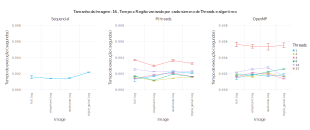

In [11]:
set_default_plot_size(31cm, 13cm)

df_plot = filter(row -> row.Size == 16, df_noio_nomem)

df_plot_seq = filter(row -> row.Algorithm =="mandelbrot_seq", df_plot)
ymins = df_plot_seq.Time .- 2.262 * (df_plot_seq.Stddev / sqrt(9))
ymaxs = df_plot_seq.Time .+ 2.262 * (df_plot_seq.Stddev / sqrt(9))
plot_seq = plot(df_plot_seq,
    x=:Image, 
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("Sequencial"),
    Guide.xticks(orientation=:vertical),
    Scale.x_discrete(order=[2, 1, 3, 4]),
    Scale.y_continuous(minvalue=-0, maxvalue=0.008),
    Theme(key_position = :none))

df_plot_pth = filter(row -> row.Algorithm =="mandelbrot_pth", df_plot)
ymins = df_plot_pth.Time .- 2.262 * (df_plot_pth.Stddev / sqrt(9))
ymaxs = df_plot_pth.Time .+ 2.262 * (df_plot_pth.Stddev / sqrt(9));
plot_pth = plot(df_plot_pth,
    x=:Image, 
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("Pthreads"),
    Guide.xticks(orientation=:vertical),
    Scale.x_discrete(order=[2, 1, 3, 4]),
    Scale.y_continuous(minvalue=-0, maxvalue=0.008),
    Theme(key_position = :none))

df_plot_omp = filter(row -> row.Algorithm =="mandelbrot_omp", df_plot)
ymins = df_plot_omp.Time .- 2.262 * (df_plot_omp.Stddev / sqrt(9))
ymaxs = df_plot_omp.Time .+ 2.262 * (df_plot_omp.Stddev / sqrt(9));
plot_omp = plot(df_plot_omp,
    x=:Image, 
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("OpenMP"),
    Scale.x_discrete(order=[2, 1, 3, 4]),
    Scale.y_continuous(minvalue=-0, maxvalue=0.008))

title(hstack(plot_seq, plot_pth, plot_omp), "Tamanho da Imagem: 16 - Tempo x Região variando por cada número de Threads e algoritmo")



Através dos gráficos acima é possível concluir que, para o menor tamanho de imagem, não há muita diferença entre os tempos em regiões diferentes. O interessante é notarmos que quanto mais threads, pior tende a ser o desempenho, dado que o overhead se torna maior que o ganho ao paralelizar o processamento.

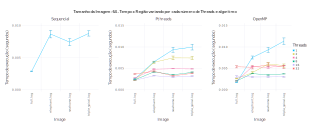

In [12]:
df_plot = filter(row -> row.Size == 64, df_noio_nomem)

df_plot_seq = filter(row -> row.Algorithm =="mandelbrot_seq", df_plot)
ymins = df_plot_seq.Time .- 2.262 * (df_plot_seq.Stddev / sqrt(9))
ymaxs = df_plot_seq.Time .+ 2.262 * (df_plot_seq.Stddev / sqrt(9))
plot_seq = plot(df_plot_seq,
    x=:Image, 
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("Sequencial"),
    Guide.xticks(orientation=:vertical),
    Scale.x_discrete(order=[2, 1, 3, 4]),
    Scale.y_continuous(minvalue=-0, maxvalue=0.008),
    Theme(key_position = :none))

df_plot_pth = filter(row -> row.Algorithm =="mandelbrot_pth", df_plot)
ymins = df_plot_pth.Time .- 2.262 * (df_plot_pth.Stddev / sqrt(9))
ymaxs = df_plot_pth.Time .+ 2.262 * (df_plot_pth.Stddev / sqrt(9))
plot_pth = plot(df_plot_pth,
    x=:Image, 
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("Pthreads"),
    Guide.xticks(orientation=:vertical),
    Scale.x_discrete(order=[2, 1, 3, 4]),
    Scale.y_continuous(minvalue=-0, maxvalue=0.008),
    Theme(key_position = :none))

df_plot_omp = filter(row -> row.Algorithm =="mandelbrot_omp", df_plot)
ymins = df_plot_omp.Time .- 2.262 * (df_plot_omp.Stddev / sqrt(9))
ymaxs = df_plot_omp.Time .+ 2.262 * (df_plot_omp.Stddev / sqrt(9))
plot_omp = plot(df_plot_omp,
    x=:Image, 
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("OpenMP"),
    Scale.x_discrete(order=[2, 1, 3, 4]),
    Scale.y_continuous(minvalue=-0, maxvalue=0.008))

title(hstack(plot_seq, plot_pth, plot_omp), "Tamanho da Imagem: 64 - Tempo x Região variando por cada número de Threads e algoritmo")

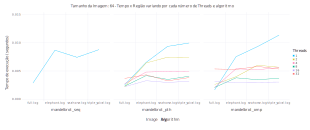

In [13]:
plot(filter(row -> row.Size == 64, df_noio_nomem),
    xgroup=:Algorithm,
    x=:Image, 
    y=:Time, 
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Threads,
    Guide.title("Tamanho da Imagem: 64 - Tempo x Região variando por cada número de Threads e algoritmo"),
    Geom.subplot_grid(Geom.line),
    Scale.x_discrete(order=[2, 1, 3, 4]))

Com o aumento no tamanho da imagem para 64x64, já é possível analisar uma mudança no comportamento entre diferentes regiões. A região Full possui um tempo menor, enquanto a região Triple Spiral costuma levar mais tempo para processar.

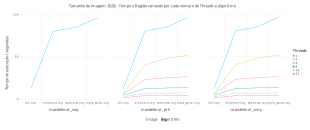

In [14]:
plot(filter(row -> row.Size == 8192, df_noio_nomem),
    xgroup=:Algorithm,
    x=:Image, 
    y=:Time, 
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Threads,
    Guide.title("Tamanho da Imagem: 8192 - Tempo x Região variando por cada número de Threads e algoritmo"),
    Geom.subplot_grid(Geom.line),
    Scale.x_discrete(order=[2, 1, 3, 4]))

Os gráficos levando em consideração o maior tamanho de imagem só corroboram o comportamento visto anteriormente. O impacto no número de Threads fica ainda mais visível.

## Do número de threads?

Aqui iremos utilizar a mesma metodologia gráfica para mostrar o comportamento de cada algoritmo de acordo com o número de threads utilizado.

Plotaremos os dados com seus devidos intervalos de confiança de 95% segundo a distribuição T Student com 9 graus de liberdade, dado o pequeno valor da amostra coletada para o experimento.

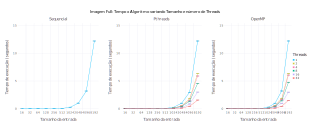

In [17]:
df_plot_full = filter(row -> row.Image == "full.log", df_noio_nomem)

df_plot_seq_full = filter(row -> row.Algorithm =="mandelbrot_seq", df_plot_full)
df_plot_seq_full = @linq df_plot_seq_full |>
              transform(Size = string.(:Size));

ymins = df_plot_seq_full.Time .- 2.262 * (df_plot_seq_full.Stddev / sqrt(9))
ymaxs = df_plot_seq_full.Time .+ 2.262 * (df_plot_seq_full.Stddev / sqrt(9))
plot_seq_full = plot(df_plot_seq_full,
    x=:Size, 
    y=:Time,
    Guide.xlabel("Tamanho da entrada"),
    Guide.ylabel("Tempo de execução (segundos)"),
    ymin=ymins,
    ymax=ymaxs,
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("Sequencial"),
    Theme(key_position = :none))

df_plot_pth_full = filter(row -> row.Algorithm =="mandelbrot_pth", df_plot_full)
df_plot_pth_full = @linq df_plot_pth_full |>
              transform(Size = string.(:Size));

ymins = df_plot_pth_full.Time .- 2.262 * (df_plot_pth_full.Stddev / sqrt(9))
ymaxs = df_plot_pth_full.Time .+ 2.262 * (df_plot_pth_full.Stddev / sqrt(9))
plot_pth_full = plot(df_plot_pth_full,
    x=:Size, 
    y=:Time,
    Guide.xlabel("Tamanho da entrada"),
    Guide.ylabel("Tempo de execução (segundos)"),
    ymin=ymins,
    ymax=ymaxs,
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("Pthreads"),
    Theme(key_position = :none))

df_plot_omp_full = filter(row -> row.Algorithm =="mandelbrot_omp", df_plot_full)
df_plot_omp_full = @linq df_plot_omp_full |>
              transform(Size = string.(:Size));
ymins = df_plot_omp_full.Time .- 2.262 * (df_plot_omp_full.Stddev / sqrt(9))
ymaxs = df_plot_omp_full.Time .+ 2.262 * (df_plot_omp_full.Stddev / sqrt(9))
plot_omp_full = plot(df_plot_omp_full,
    x=:Size, 
    y=:Time,
    Guide.xlabel("Tamanho da entrada"),
    Guide.ylabel("Tempo de execução (segundos)"),
    ymin=ymins,
    ymax=ymaxs,
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("OpenMP"))

title(hstack(plot_seq_full, plot_pth_full, plot_omp_full), "Imagem Full: Tempo x Algoritmo variando Tamanho e número de Threads")



Através do gráfico acima que mostra como as variações do tamanho das imagens e a quantidade de threads impactam o tempo de execução dos algoritmos na imagem Full, podemos perceber uma relação inversamente proporcional entre threads e tempo.

Ao observamos o comportamento da linha azul que representa uma única thread, percebemos que não há diferença notável entre os três algoritmos, uma vez que com apenas uma thread executamos os algoritmos paralelos de maneira análoga ao sequencial. Da mesma maneira, a criação de um número grande de threads para pequenos tamanhos de entrada também não se mostra muito vantajosa em relação ao programa sequencial. Podemos observar claramente esse efeito ao olharmos o começo do comportamento da linha vermelha representando 32 threads nos algortimos mandelbrot_pth e mandelbrot_omp.

Ademais, apartando essas casos específicos vemos, como já era esperado, que ao aumentarmos o número de threads, mais rápida é a execução do programa e que com o aumento do tamanho de entrada, maior é o tempo. Dessa maneira, para termos um bom desempenho em relação ao tempo de execução, ao aumentarmos o tamanho, precisamos aumentar o número de threads, impacto que fica evidente ao olharmos a parte final dos gráficos: maiores tamanhos com maior número de threads resultam nos menores tempos encontrados.

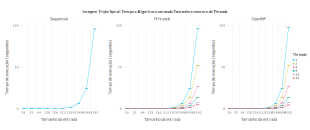

In [18]:
df_plot_triple = filter(row -> row.Image == "triple_spiral.log", df_noio_nomem)

df_plot_seq_triple = filter(row -> row.Algorithm =="mandelbrot_seq", df_plot_triple)
df_plot_seq_triple = @linq df_plot_seq_triple |>
              transform(Size = string.(:Size));

ymins = df_plot_seq_triple.Time .- 2.262 * (df_plot_seq_triple.Stddev / sqrt(9))
ymaxs = df_plot_seq_triple.Time .+ 2.262 * (df_plot_seq_triple.Stddev / sqrt(9));
plot_seq_triple = plot(df_plot_seq_triple,
    x=:Size, 
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Guide.xlabel("Tamanho da entrada"),
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("Sequencial"),
    Theme(key_position = :none))

df_plot_pth_triple = filter(row -> row.Algorithm =="mandelbrot_pth", df_plot_triple)
df_plot_pth_triple = @linq df_plot_pth_triple |>
              transform(Size = string.(:Size));

ymins = df_plot_pth_triple.Time .- 2.262 * (df_plot_pth_triple.Stddev / sqrt(9))
ymaxs = df_plot_pth_triple.Time .+ 2.262 * (df_plot_pth_triple.Stddev / sqrt(9));
plot_pth_triple = plot(df_plot_pth_triple,
    x=:Size, 
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Guide.xlabel("Tamanho da entrada"),
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("Pthreads"),
    Theme(key_position = :none))

df_plot_omp_triple = filter(row -> row.Algorithm =="mandelbrot_omp", df_plot_triple)
df_plot_omp_triple = @linq df_plot_omp_triple |>
              transform(Size = string.(:Size));

ymins = df_plot_omp_triple.Time .- 2.262 * (df_plot_omp_triple.Stddev / sqrt(9))
ymaxs = df_plot_omp_triple.Time .+ 2.262 * (df_plot_omp_triple.Stddev / sqrt(9));
plot_omp_triple = plot(df_plot_omp_triple,
    x=:Size, 
    y=:Time,
    ymin=ymins,
    ymax=ymaxs,
    Guide.xlabel("Tamanho da entrada"),
    Guide.ylabel("Tempo de execução (segundos)"),
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("OpenMP"))

title(hstack(plot_seq_triple, plot_pth_triple, plot_omp_triple), "Imagem Triple Spiral: Tempo x Algoritmo variando Tamanho e número de Threads")



Apenas para efeito de visualização, plotamos também o mesmo gráfico para a imagem Triple Spiral que é a região que apresentou maior tempo de execução. Nele podemos ver que os mesmos comportamentos descritos anteriormente ainda valem e que isso é independente da imagem que escolhemos.

# Qual o impacto das operações de I/O e alocação de memória no tempo de execução?

In [ ]:
plot(df, xgroup=:Image, 
    x=:Size, 
    y=:Time, 
    color=:Threads, 
    Geom.subplot_grid(Geom.point),
    Guide.title("Visão geral para cada região: variando o tamanho da entrada, região e número de threads"),
    Scale.y_log10)

### Gráfico 2 - comportamento de cada algoritmo por thread e tamanho

In [ ]:
plot(df, 
    x=:Algorithm, 
    y=:Time, 
    color=:Size, 
    size=:Threads, 
    Geom.point,
    Guide.title("Desempenho de cada algoritmo variando o tamanho das imagens e o número de threads"))

In [ ]:
# separar cada região
df_full = filter(row -> row.Image == "full.log", df)
df_elephant = filter(row -> row.Image == "elephant.log", df)
df_seahorse = filter(row -> row.Image == "seahorse.log", df)
df_triple_spiral = filter(row -> row.Image == "triple_spiral.log", df);

### Gráfico 3 - comportamento de cada algoritmo com uma thread na imagem Full

In [ ]:
df_full_1thread = filter(row -> row.Threads == 1, df_full)
plot(df_full_1thread, 
    x=:Size, 
    y=:Time, 
    color=:Algorithm, 
    Geom.line, 
    Guide.title("Desempenho dos algoritmos utilizando uma thread na imagem full"))

### Gráfico 4 - comportamento de cada algoritmo em relação a imagem Full

In [ ]:
plot(df_full, 
    x=:Algorithm,
    y=:Time, 
    color=:Size, 
    size=:Threads,
    Coord.Cartesian(ymin=-1,ymax=30),
    Geom.point,
    Guide.title("Desempenho de cada algoritmo na imagem full variando o número de threads"))

### Gráfico 5 - comportamento de cada algoritmo em relação a região Elephant

In [ ]:
plot(df_elephant, 
    x=:Algorithm, 
    y=:Time,
    Coord.Cartesian(ymin=-1,ymax=100),
    color=:Size, 
    size=:Threads, 
    Geom.point,
    Guide.title("Desempenho de cada algoritmo na imagem Elephant variando o número de threads"))

### Gráfico 6 - comportamento de cada algoritmo em relação a região Seahorse

In [ ]:
plot(df_seahorse, 
    x=:Algorithm, 
    y=:Time, 
    Coord.Cartesian(ymin=-1,ymax=100),
    color=:Size, 
    size=:Threads, 
    Geom.point,
    Guide.title("Desempenho de cada algoritmo na imagem Seahorse variando o número de threads"))

### Gráfico 7 - comportamento de cada algoritmo em relação a região Triple Spiral

In [ ]:
plot(df_triple_spiral, 
    x=:Algorithm, 
    y=:Time, 
    Coord.Cartesian(ymin=-1,ymax=150),
    color=:Size, 
    size=:Threads, 
    Geom.point,
    Guide.title("Desempenho de cada algoritmo na imagem Triple Spiral variando o número de threads"))

Podemos ainda analisar qual é o impacto causado no tempo pela execução das instruções de alocação de memória para cada região do conjunto, conforme mostram os gráficos 8, 9, 10 e 11.

### Gráfico 8 - impacto da alocação de memória para região Elephant

In [ ]:
plot(df_elephant, 
    xgroup=:Threads, 
    x=:Size, 
    y=:Time, 
    color=:MemAlloc, 
    Geom.subplot_grid(Geom.line),
    Guide.title("Impacto da alocação de memória na imagem Elephant"))

### Gráfico 9 - impacto da alocação de memória para região Seahorse

In [ ]:
plot(df_seahorse, 
    xgroup=:Threads, 
    x=:Size, 
    y=:Time, 
    color=:MemAlloc, 
    Geom.subplot_grid(Geom.line),
     Guide.title("Impacto da alocação de memória na imagem Seahorse"))

### Gráfico 10 - impacto da alocação de memória para região Triple Spiral

In [ ]:
plot(df_triple_spiral, 
    xgroup=:Threads, 
    x=:Size, 
    y=:Time, 
    color=:MemAlloc, 
    Geom.subplot_grid(Geom.line),
     Guide.title("Impacto da alocação de memória na imagem Triple Spiral"))

### Gráfico 11 - impacto da alocação de memória para imagem Full

In [ ]:
plot(df_full, 
    xgroup=:Threads, 
    x=:Size, 
    y=:Time, 
    color=:MemAlloc, 
    Geom.subplot_grid(Geom.line),
     Guide.title("Impacto da alocação de memória na imagem Full"))

### Gráfico 12 - impacto da alocação de memória no algoritmo sequencial para imagem Full

In [ ]:
df_seq_full = filter(row -> row.Algorithm == "mandelbrot_seq", df_full)
df_seq_alloc = filter(row -> row.MemAlloc == 1, df_seq_full)
df_seq_no_alloc = filter(row -> row.MemAlloc == 0, df_seq_full)
point_alloc = layer(df_seq_alloc, x="Size", y="Time", Geom.point,Theme(default_color=colorant"blue"))
point_no_aloc = layer(df_seq_no_alloc, x="Size", y="Time", Geom.point,Theme(default_color=colorant"red"))
plot(point_alloc,
    point_no_aloc,
    Guide.manual_color_key("Legenda", ["Com alocação", "Sem alocação"], ["blue", "red"]),
    Guide.title("Impacto da alocação de memória no algoritmo sequencial para a imagem full"))

In [ ]:
describe(df)

In [ ]:
# Displaying column types
eltype.(eachcol(df))

In [ ]:
# nao funciona nessa versao :(
categorical!(df, :MemAlloc)

In [ ]:
threads_values = unique(df.Threads)